In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder

In [3]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

with zipfile.ZipFile('heart-disease-data.zip', 'r') as zip_ref:
    zip_ref.extractall('heart_disease_data')

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
heart-disease-data.zip: Skipping, found more recently modified local copy (use --force to force download)


<div style="color:red;">
  <h1>Data Dictionary:</h1>
  <ol>
    <li>id (Unique id for each patient)</li>
    <li>age (Age of the patient in years)</li>
    <li>origin (place of study)</li>
    <li>sex (Male/Female)</li>
    <li>cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])</li>
    <li>trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>chol (serum cholesterol in mg/dl)</li>
    <li>fbs (if fasting blood sugar > 120 mg/dl)</li>
    <li>restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]</li>
    <li>thalach: maximum heart rate achieved</li>
    <li>exang: exercise-induced angina (True/ False)</li>
    <li>oldpeak: ST depression induced by exercise relative to rest</li>
    <li>slope: the slope of the peak exercise ST segment</li>
    <li>ca: number of major vessels (0-3) colored by fluoroscopy</li>
    <li>thal: [normal; fixed defect; reversible defect]</li>
    <li>num: the predicted attribute</li>
  </ol>
</div>


## Data Exploring & Preprocessing

In [4]:
data = pd.read_csv('heart_disease_data/heart_disease_uci.csv', index_col = 0)
data.shape

(920, 15)

In [5]:
data

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [8]:
for col in data.columns:
    # If the column is of type object or category (likely to be categorical data)
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        print(f"Column '{col}' is categorical. Converting to numerical...")
        
        LE = LabelEncoder()
        
        data[col] = LE.fit_transform(data[col])

Column 'sex' is categorical. Converting to numerical...
Column 'dataset' is categorical. Converting to numerical...
Column 'cp' is categorical. Converting to numerical...
Column 'fbs' is categorical. Converting to numerical...
Column 'restecg' is categorical. Converting to numerical...
Column 'exang' is categorical. Converting to numerical...
Column 'slope' is categorical. Converting to numerical...
Column 'thal' is categorical. Converting to numerical...


In [9]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [10]:
data.describe()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920.000000,920.000000,861.000000,890.000000,920.000000,920.000000,865.000000,920.000000,858.000000,920.000000,309.000000,920.000000,920.000000
mean,53.510870,0.789130,1.238043,0.782609,132.132404,199.130337,0.345652,0.994565,137.545665,0.485870,0.878788,1.823913,0.676375,2.215217,0.995652
std,9.424685,0.408148,1.130673,0.956350,19.066070,110.780810,0.649837,0.638767,25.926276,0.608085,1.091226,0.977146,0.935653,0.946551,1.142693
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,0.000000,120.000000,175.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,140.000000,0.000000,0.500000,2.000000,0.000000,3.000000,1.000000
75%,60.000000,1.000000,2.000000,2.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,3.000000,1.000000,3.000000,2.000000
max,77.000000,1.000000,3.000000,3.000000,200.000000,603.000000,2.000000,3.000000,202.000000,2.000000,6.200000,3.000000,3.000000,3.000000,4.000000


In [13]:
df1 = data.drop(columns=['ca','slope','thal'], inplace=False)
df1.dropna(inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 1 to 920
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       827 non-null    int64  
 1   sex       827 non-null    int32  
 2   dataset   827 non-null    int32  
 3   cp        827 non-null    int32  
 4   trestbps  827 non-null    float64
 5   chol      827 non-null    float64
 6   fbs       827 non-null    int32  
 7   restecg   827 non-null    int32  
 8   thalch    827 non-null    float64
 9   exang     827 non-null    int32  
 10  oldpeak   827 non-null    float64
 11  num       827 non-null    int64  
dtypes: float64(4), int32(6), int64(2)
memory usage: 64.6 KB


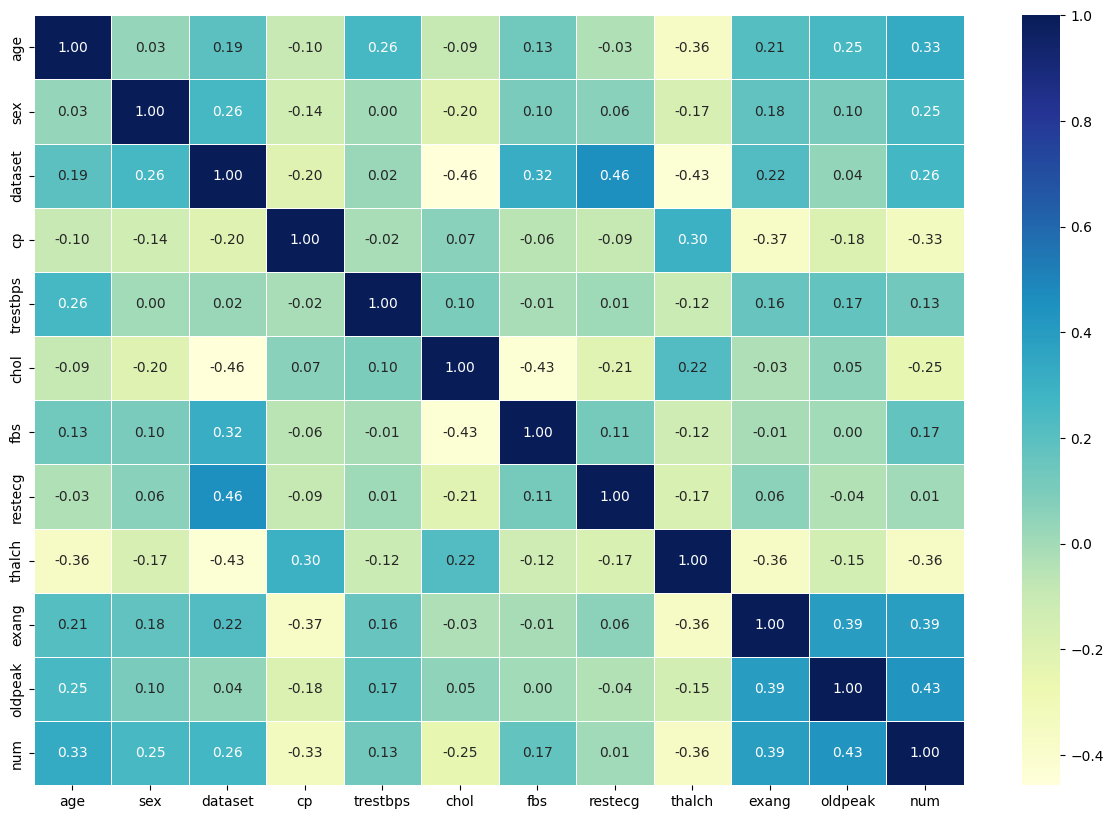

In [24]:
corr_matrix = df1.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [27]:
x = df1.drop("num",axis=1)
y = df1["num"]

In [28]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
len(y_train)

661

We are Going to try 3 different machine learning classification models:
1. Logistic Regression
2. KNN Classifier
3. Random Forest Classifier

In [36]:
models = {"Logistic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, x_train, x_test, y_train, y_test) :
    # to fit and evaluate machine learning models
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items() :
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [37]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores

c:\Users\Mohamad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.5662650602409639,
 'KNN': 0.45180722891566266,
 'Random Forest': 0.5602409638554217}